In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

%matplotlib inline

In [2]:
path_to_imgs = "/Dataset/"
# print(os.getcwd() + path_to_imgs)

### 1) Preprocessing: Detect face and eye

(1333, 2000, 3)


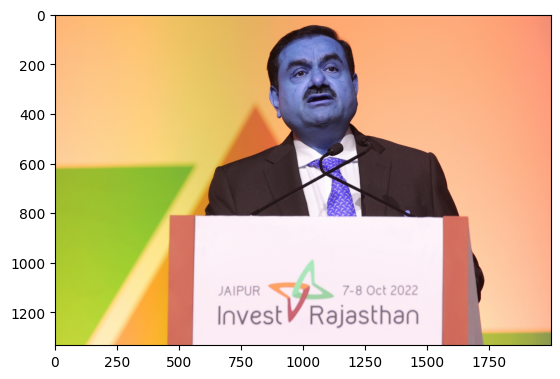

In [3]:
path_to_test = "/Test_images/"
# print(os.getcwd() + path_to_test)

color_img = cv2.imread(os.getcwd() + path_to_test + "9b5469c18751002ada0d9181309377a2.jpg")
print(color_img.shape)
plt.imshow(color_img)

(1333, 2000)


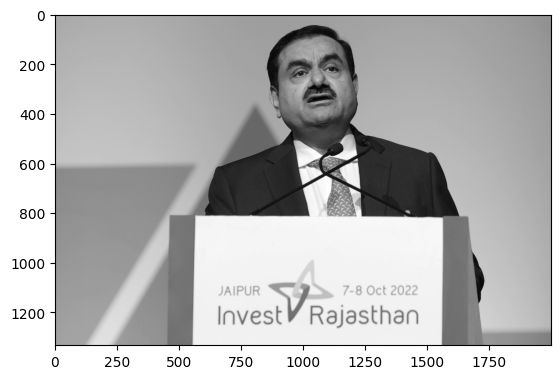

In [4]:
gray_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)
print(gray_img.shape)
plt.imshow(gray_img, cmap="gray")

In [5]:
path_to_haar_clf = "/Opencv/haarcascades/"
face_clf = cv2.CascadeClassifier(os.getcwd() + path_to_haar_clf + "haarcascade_frontalface_default.xml")
eye_clf = cv2.CascadeClassifier(os.getcwd() + path_to_haar_clf + "haarcascade_eye.xml")

In [6]:
# face_loc = face_clf.detectMultiScale(color_img,1.3,5)
# (x,y,w,h) = face_loc[0]
# color_face = cv2.rectangle(color_img,(x,y),(x+w,y+h),(255,0,0),5)
# plt.imshow(color_face)

In [7]:
# for (x,y,w,h) in face_loc:
#     face_detected = cv2.rectangle(color_img,(x,y),(x+w,y+h),(255,0,0),5)
#     c_face = face_detected[y:y+h,x:x+w]
#     g_face = gray_img[y:y+h,x:x+w]
#     eye_loc = eye_clf.detectMultiScale(g_face)
#     for (x_e,y_e,w_e,h_e) in eye_loc:
#         eye_detected = cv2.rectangle(c_face,(x_e,y_e),(x_e+w_e,y_e+h_e),(0,255,0),2)

# plt.figure()
# plt.imshow(face_detected, cmap="gray")
# plt.show()

### 2) Preprocessing: Crop the face

In [8]:
# %matplotlib inline

# plt.imshow(c_face, cmap='gray')

In [9]:
# cropped_img = np.array(c_face)
# cropped_img.shape

## To get a cropped image if 2 eyes are seen in an image

In [13]:
def get_a_cropped_img_if_both_eyes(img_path):
    img = cv2.imread(img_path)
    g_img = cv2.cvtColor(color_img,cv2.COLOR_BGR2GRAY)
    faces_loc = face_clf.detectMultiScale(color_img, 1.3, 5)
    for (x,y,w,h) in faces_loc:
        c_face = img[y:y+h,x:x+h]
        g_face = g_img[y:y+h,x:x+h]
        eyes_loc = eye_clf.detectMultiScale(g_face)
        if len(eyes_loc) >= 2:
            return c_face

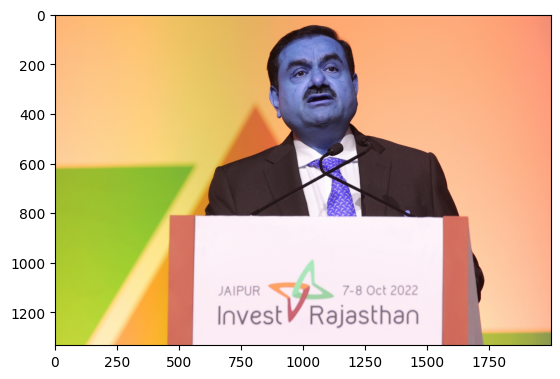

In [14]:
img_1 = cv2.imread(os.getcwd() + path_to_test + "9b5469c18751002ada0d9181309377a2.jpg")
plt.imshow(img_1)

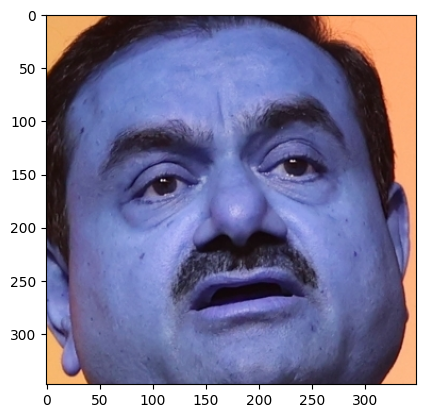

In [15]:
cropped_img = get_a_cropped_img_if_both_eyes(os.getcwd() + path_to_test + "9b5469c18751002ada0d9181309377a2.jpg")
plt.imshow(cropped_img)

### 3) Preprocessing: Use wavelet transform as a feature for training our model

In [16]:
# import numpy as np
# import pywt
# import cv2    

# def w2d(color_img, mode='haar', level=1):
#     imArray = color_img
#     #Datatype conversions
#     #convert to grayscale
#     imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
#     #convert to float
#     imArray =  np.float32(imArray)   
#     imArray /= 255;
#     # compute coefficients 
#     coeffs=pywt.wavedec2(imArray, mode, level=level)

#     #Process Coefficients
#     coeffs_H=list(coeffs)  
#     coeffs_H[0] *= 0;  

#     # reconstruction
#     imArray_H=pywt.waverec2(coeffs_H, mode);
#     imArray_H *= 255;
#     imArray_H =  np.uint8(imArray_H)

#     return imArray_H

In [17]:
# im_har = w2d(cropped_img,'db1',5)
# plt.imshow(im_har, cmap='gray')

### Create a cropped dataset

#### 1) Create a images path for every subdir in dataset 

In [36]:
subdir_paths = []
for subdir in os.scandir(os.getcwd() + path_to_imgs):
    if subdir.is_dir():
        subdir_paths.append(subdir.path)
        
# subdir_paths

#### 2) Create a folder for all cropped images

In [19]:
import shutil

path_to_cr_imgs = "/Dataset/Cropped_data/"
if os.path.exists(os.getcwd() + path_to_cr_imgs): # checks if "Cropped_data" folder exists
    shutil.rmtree(os.getcwd() + path_to_cr_imgs) # removes the folder if it exists
os.mkdir(os.getcwd() + path_to_cr_imgs) # creates a new folder name "Cropped_data"

#### 3) Iterate through each image to get cropped images

In [ ]:
import imghdr

cropped_img_dirs = []
leaders_img_title_dict = {}

for img_dirs in subdir_paths:
    count = 1
    leader = img_dirs.split("/")[-1]
    print(leader)
    for img_dir in os.scandir(img_dirs):
        if imghdr.what(img) is not None:
            c_img = get_a_cropped_img_if_both_eyes(img.path)
            cropped_folder = os.getcwd() + path_to_cr_imgs + leader
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_img_dirs.append(cropped_folder)
#                 print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_img_name = leader + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_img_name
            
            cv2.imwrite(cropped_file_path, c_img)
        

elon_musk
